# Lab 2 Examples: Sequence Modelling with Deep Learning RNNs and LSTMs.
Recurent Neural Network is a type of deep learning model which able to include temporal dependency of sample sequences during learning and inference.

<img src='https://drive.google.com/uc?id=1ShO_v4HfFzBY5zam0SCQ_82X9yz86gf_' width="375" height="175">

This examples provide:
1. Basic examples to understand how to implement RNNs/LSTMs in PyTorch
2. An toy example on how to train and evaluate RNNs/LSTMs using PyTorch to solve se
3. A practical example illustrating the use RNNs/LSTMs for deep learning-based cryptoanalysis







# 1. Introduction: RNNs and LSTM modules with PyTorch

## 1.1. Standard RNN with a single sequence input


In [19]:
import torch
from torch import nn

# Generate random sequence
input_size = 3
sequence_length = 10
random_sequence = torch.randn(sequence_length, input_size)

# Initialize RNN module
hidden_size = 5
bias = False
rnn_module = nn.RNN(input_size = input_size,
                    hidden_size = hidden_size,
                    bias = bias, batch_first = True)

# Print RNN parameters
print('------------------')
print('RNN Parameters')
for param_name,param in rnn_module.state_dict().items():
  print(f'{param_name}: {param.shape}')

# Compute Forward pass over the sequence with the RNN
output_hidden_states, last_hidden_state = rnn_module(random_sequence)

# Print Obtained hidden states
print('------------------')
print('Hidden States for each input in the sequence')
print(output_hidden_states.shape) #(sequence_length, hidden_size)
print(output_hidden_states)

print('------------------')
print('Last hidden state')
print(last_hidden_state.shape) #(n_layers, hidden_size)
print(last_hidden_state)

------------------
RNN Parameters
weight_ih_l0: torch.Size([5, 3])
weight_hh_l0: torch.Size([5, 5])
------------------
Hidden States for each input in the sequence
torch.Size([10, 5])
tensor([[-0.5759,  0.3562,  0.2401, -0.5216,  0.3219],
        [ 0.0378, -0.5082, -0.1241, -0.0464,  0.7312],
        [ 0.6879, -0.4035,  0.0864,  0.7816, -0.7248],
        [ 0.7215,  0.2083, -0.3693,  0.7830, -0.9769],
        [-0.0587,  0.1325, -0.5964, -0.0758, -0.1983],
        [-0.4506,  0.2457,  0.3436, -0.5739,  0.3100],
        [ 0.3546, -0.5376, -0.2123,  0.3160,  0.5993],
        [ 0.0973, -0.2846, -0.2784,  0.3808,  0.4364],
        [ 0.0713,  0.0017,  0.1467, -0.1151,  0.1770],
        [ 0.1885, -0.0339, -0.0283,  0.1407,  0.2057]],
       grad_fn=<SqueezeBackward1>)
------------------
Last hidden state
torch.Size([1, 5])
tensor([[ 0.1885, -0.0339, -0.0283,  0.1407,  0.2057]],
       grad_fn=<SqueezeBackward1>)


## 1.2. Standard RNN with a sequence batch input


In [20]:
import torch
from torch import nn

# Generate N random sequences
input_size = 3
sequence_length = 10
N_sequences = 4
random_sequence = torch.randn(N_sequences, sequence_length, input_size)

# Initialize RNN module
hidden_size = 5
bias = False
rnn_module = nn.RNN(input_size = input_size,
                    hidden_size = hidden_size,
                    bias = bias, batch_first = True)

# Print RNN parameters
print('------------------')
print('RNN Parameters')
for param_name,param in rnn_module.state_dict().items():
  print(f'{param_name}: {param.shape}')

# Compute Forward pass over the sequence with the RNN
output_hidden_states, last_hidden_state = rnn_module(random_sequence)

# Print Obtained hidden states
print('------------------')
print('Hidden States for each input in the sequence')
print(output_hidden_states.shape) #(n_sequences, sequence_length, hidden_size)
print(output_hidden_states)

print('------------------')
print('Last hidden state')
print(last_hidden_state.shape) #(n_layers, n_sequences, hidden_size)
print(last_hidden_state)

------------------
RNN Parameters
weight_ih_l0: torch.Size([5, 3])
weight_hh_l0: torch.Size([5, 5])
------------------
Hidden States for each input in the sequence
torch.Size([4, 10, 5])
tensor([[[-0.1461, -0.0869,  0.0607,  0.2375,  0.0973],
         [-0.2628, -0.1435,  0.0566,  0.3430,  0.0187],
         [ 0.4933,  0.6882,  0.1647, -0.0659,  0.6444],
         [-0.3648, -0.2021, -0.2562,  0.3784,  0.2262],
         [-0.0769,  0.6183,  0.5540,  0.3250,  0.6594],
         [ 0.1130,  0.7328, -0.0216,  0.4957,  0.8960],
         [ 0.0227,  0.2291, -0.1501,  0.3345,  0.4994],
         [-0.1997, -0.0249,  0.0224,  0.0805, -0.0722],
         [ 0.2557, -0.6624, -0.5442, -0.3608, -0.7872],
         [ 0.6152, -0.2826, -0.1108, -0.6541, -0.6622]],

        [[ 0.3856,  0.0768, -0.2112, -0.1334,  0.0683],
         [-0.0501,  0.5351,  0.4227,  0.3054,  0.7225],
         [-0.2526,  0.3433, -0.0988,  0.4707,  0.6305],
         [-0.1926, -0.2093, -0.0802,  0.4506,  0.0939],
         [ 0.4898,  0.5231,

## 1.3 Multilayer RNN


In [21]:
import torch
from torch import nn

# Generate N random sequences
input_size = 3
sequence_length = 10
N_sequences = 4
random_sequence = torch.randn(N_sequences, sequence_length, input_size)

# Initialize RNN module
hidden_size = 5
num_layers = 2
bias = False
rnn_module = nn.RNN(input_size = input_size,
                    hidden_size = hidden_size,
                    bias = bias, batch_first = True, num_layers=num_layers)

# Print RNN parameters
print('------------------')
print('RNN Parameters')
for param_name,param in rnn_module.state_dict().items():
  print(f'{param_name}: {param.shape}')

# Compute Forward pass over the sequence with the RNN
output_hidden_states, last_hidden_state = rnn_module(random_sequence)

# Print Obtained hidden states
print('------------------')
print('Hidden States for each input in the sequence')
print(output_hidden_states.shape) #(n_sequences, sequence_length, hidden_size)
print(output_hidden_states)

print('------------------')
print('Last hidden state')
print(last_hidden_state.shape) #(n_layers, n_sequences, hidden_size)
print(last_hidden_state)

------------------
RNN Parameters
weight_ih_l0: torch.Size([5, 3])
weight_hh_l0: torch.Size([5, 5])
weight_ih_l1: torch.Size([5, 5])
weight_hh_l1: torch.Size([5, 5])
------------------
Hidden States for each input in the sequence
torch.Size([4, 10, 5])
tensor([[[ 0.0886,  0.1240,  0.0919, -0.0980,  0.0623],
         [ 0.0375,  0.1148,  0.0165,  0.1433, -0.1285],
         [-0.0558, -0.0148, -0.0399,  0.1503, -0.0396],
         [ 0.0503, -0.2770,  0.0170, -0.1589,  0.1286],
         [-0.0141, -0.0034, -0.0306, -0.0777, -0.1222],
         [ 0.0509,  0.1088, -0.0328, -0.1015,  0.0137],
         [ 0.0617,  0.0834, -0.0970,  0.1679, -0.1552],
         [ 0.0430, -0.0319, -0.0838,  0.1359, -0.0706],
         [ 0.3077,  0.2822,  0.1517, -0.2265,  0.0679],
         [ 0.0561, -0.3668,  0.0196, -0.1177,  0.0429]],

        [[-0.2129, -0.1584, -0.1465,  0.1942, -0.0785],
         [ 0.1817,  0.1693,  0.0617, -0.1498,  0.0664],
         [-0.0374, -0.2077,  0.0282, -0.1250,  0.1269],
         [-0.0049

## 1.4 LSTM example

In [22]:
import torch
from torch import nn

# Generate N random sequences
input_size = 3
sequence_length = 10
N_sequences = 4
random_sequence = torch.randn(N_sequences, sequence_length, input_size)

# Initialize RNN module
hidden_size = 5
num_layers = 2
bias = False
lstm_module = nn.LSTM(input_size = input_size,
                    hidden_size = hidden_size,
                    bias = bias, batch_first = True, num_layers=num_layers)

# Print LSTM parameters
print('------------------')
print('LSTM Parameters')
for param_name,param in rnn_module.state_dict().items():
  print(f'{param_name}: {param.shape}')

# Compute Forward pass over the sequence with the LSTM
output_hidden_states, last_states= lstm_module(random_sequence)

# The module returns hidden_states and cell_states of the LSTM
last_hidden_state = last_states[0]
last_cell_state = last_states[1]

# Print Obtained hidden states
print('------------------')
print('Hidden States for each input in the sequence')
print(output_hidden_states.shape) #(n_sequences, sequence_length, hidden_size)
print(output_hidden_states)

print('------------------')
print('Last hidden state')
print(last_hidden_state.shape) #(n_layers, n_sequences, hidden_size)
print(last_hidden_state)

print('------------------')
print('Last cell state')
print(last_cell_state.shape) #(n_layers, n_sequences, hidden_size)
print(last_cell_state)

------------------
LSTM Parameters
weight_ih_l0: torch.Size([5, 3])
weight_hh_l0: torch.Size([5, 5])
weight_ih_l1: torch.Size([5, 5])
weight_hh_l1: torch.Size([5, 5])
------------------
Hidden States for each input in the sequence
torch.Size([4, 10, 5])
tensor([[[-5.8089e-03, -1.0526e-04, -5.6054e-03,  4.5465e-03, -3.4774e-03],
         [ 3.5233e-03,  5.1206e-03, -7.7160e-03,  4.9629e-03, -5.3330e-03],
         [ 8.7571e-03,  6.7735e-03,  7.4104e-04, -4.6186e-03,  1.8915e-03],
         [ 1.1619e-02,  5.7955e-03,  1.8840e-03, -6.1241e-03,  4.1118e-03],
         [ 1.0224e-02,  4.7342e-03,  1.0132e-03, -7.0768e-03,  5.0797e-03],
         [ 1.9463e-02,  2.0460e-03,  1.1892e-02, -1.3015e-02,  1.0321e-02],
         [-1.9148e-02, -9.1678e-03,  2.7425e-03,  5.5894e-03, -7.5147e-04],
         [ 5.5398e-03, -9.8688e-03,  2.8369e-02, -8.6117e-03,  7.6417e-03],
         [ 4.4314e-02, -4.7264e-03,  4.2611e-02, -2.8591e-02,  1.8084e-02],
         [ 4.9985e-02, -5.5990e-03,  4.5231e-02, -3.6690e-02, 

# 2. Sequence Classification with RNNs


## 2.1 Generate Sequence Classification Dataset and Visualize


Train Seqs: (70, 20)
Train Labels: (70,)
Test Seqs: (10, 20)
Test Labels: (10,)


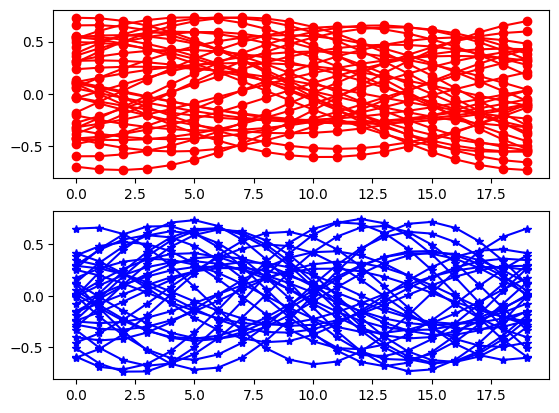

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


seq_length = 20 # Lenght of each generated
N = 40 # Total number of sequences generated
N_test = 10 # Num Test Sequences
x = np.linspace(0,2*np.pi,seq_length) # Functions domain

# Positive Label Sequences: Cosine functions with period=0.5 and random amplitudes, phases and noises
label1_amps = np.random.rand(N)*0.5+0.25
label1_phase = np.random.rand(N)*2*np.pi
noise = np.random.randn(N)
label1_seqs = np.cos(x[np.newaxis,:].repeat(N,axis=0)+label1_phase[:,np.newaxis])*label1_amps[:,np.newaxis]

# Negative Label Sequences: Cosine functions with period=1.0 and random amplitudes, phases and noises
label2_amps = np.random.rand(N)*0.5+0.25
label2_phase = np.random.rand(N)*2*np.pi
noise = np.random.randn(N)
label2_seqs = np.cos(0.5*x[np.newaxis,:].repeat(N,axis=0)+label2_phase[:,np.newaxis])*label2_amps[:,np.newaxis]

X = np.concatenate((label1_seqs,label2_seqs),axis=0)
Y =np.concatenate((np.ones(N),np.zeros(N))) # Label 0/1 for postive and negative sequences


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=N_test)
print(f'Train Seqs: {X_train.shape}')
print(f'Train Labels: {Y_train.shape}')
print(f'Test Seqs: {X_test.shape}')
print(f'Test Labels: {Y_test.shape}')


plt.subplot(2,1,1)
plt.plot(X_train[Y_train==0,:].T,'-ro');
plt.subplot(2,1,2)
plt.plot(X_train[Y_train==1,:].T,'-b*');




## 2.2 Sequence classifier implementation

In [24]:
from torch.nn.modules import activation
import torch
from torch import nn

# Define module encapsulating a Sequence Classifier using RNN or LSTMs and setting different architecture hyper-parameters
class SequenceClassifier(nn.Module):
  def __init__(self,
               input_size : int = 1,
               hidden_size : int = 5,
               num_layers = 1,
               use_lstm : bool = False):
    # Define RNN or LSTM architecture
    super().__init__()
    self.use_lstm = use_lstm
    if(use_lstm):
      self.rnn =  nn.LSTM(input_size = input_size, hidden_size = hidden_size,
                          num_layers=num_layers, batch_first = True)
    else:
      self.rnn =  nn.RNN(input_size = input_size, hidden_size = hidden_size,
                         num_layers=num_layers, batch_first = True)
    self.sigmoid = nn.Sigmoid()
    self.last_linear = nn.Linear(hidden_size,1)

  def forward(self, X):
    _,last_states = self.rnn(X)
    # Get last hidden state for last layer. Ignore cell state in case of LSTMs
    if(not self.use_lstm):
      last_hidden_state = last_states[-1,:,:].squeeze(0)
    else:
      last_hidden_state = last_states[0][-1,:,:].squeeze(0)
    # Get sequence label probability using the last hidden state
    output = self.sigmoid(self.last_linear(last_hidden_state))
    return output


## 2.3 Sequence Classifier Training and Evaluation Function

In [25]:
# Conduct Gradient Descent Optimization over the training dataset
def train_sequence_classifier(X_train, Y_train, seq_classifier, optimizer, loss_func, epochs=100):
    loss_its = []
    for iter in range(epochs):
      optimizer.zero_grad()
      output = seq_classifier(X_train)
      loss = loss_func(output,Y_train)
      loss_its.append(loss.item())
      loss.backward()
      optimizer.step()
    print(f'Final loss: {loss.item()}')
    return np.asarray(loss_its)


In [26]:
# Compute accuracy accross testing dataset
def test_sequence_classifier(X_test, Y_test, seq_classifier, prob_threshold=0.5):
  output = seq_classifier(X_test)
  accuracy = (((output>prob_threshold)==(Y_test>prob_threshold))*1.0).mean()
  print(f'Test Accuracy: {accuracy.item()}')
  return accuracy.item()

## 2.4 RNN and LSTM experimental evaluation

In [27]:
# Dataset to PyTorch format
X_train_pt = torch.from_numpy(X_train).float().unsqueeze(2).cuda()
Y_train_pt = torch.from_numpy(Y_train).float().unsqueeze(1).cuda()
X_test_pt = torch.from_numpy(X_test).float().unsqueeze(2).cuda()
Y_test_pt = torch.from_numpy(Y_test).float().unsqueeze(1).cuda()

# Define Binary Cross entr
loss_func = nn.BCELoss()

input_size = 1
exp_hidden_size = [1,1,1,1,5,5,5,5]
exp_num_layers = [1,1,2,2,1,1,2,2]
exp_use_lstm = [False,False,False,False,True,True,True,True]


losses_models = {}
test_accuracy_models = {}
for hidden_size, num_layers, use_lstm in zip(exp_hidden_size,exp_num_layers,exp_use_lstm):
  model_id = f'H{hidden_size}_NL{num_layers}_LSTM{int(use_lstm)}'
  print(f'Training: {model_id}')
  seq_classifier = SequenceClassifier(use_lstm=use_lstm,num_layers=num_layers,hidden_size=hidden_size)
  seq_classifier.cuda()
  optimizer = torch.optim.Adam(seq_classifier.parameters(), lr=1e-3)
  losses_models[model_id] = train_sequence_classifier(X_train_pt, Y_train_pt,
                            seq_classifier, optimizer,
                            loss_func, epochs=1000)
  test_accuracy_models[model_id]  = test_sequence_classifier(X_test_pt,Y_test_pt,seq_classifier)



Training: H1_NL1_LSTM0
Final loss: 0.691501796245575
Test Accuracy: 0.30000001192092896
Training: H1_NL1_LSTM0
Final loss: 0.5909203886985779
Test Accuracy: 0.800000011920929
Training: H1_NL2_LSTM0
Final loss: 0.6787157654762268
Test Accuracy: 0.30000001192092896
Training: H1_NL2_LSTM0
Final loss: 0.6915087103843689
Test Accuracy: 0.30000001192092896
Training: H5_NL1_LSTM1
Final loss: 0.014835466630756855
Test Accuracy: 1.0
Training: H5_NL1_LSTM1
Final loss: 0.037622131407260895
Test Accuracy: 0.800000011920929
Training: H5_NL2_LSTM1
Final loss: 0.01608080230653286
Test Accuracy: 1.0
Training: H5_NL2_LSTM1
Final loss: 0.011980523355305195
Test Accuracy: 0.699999988079071


### 2.3.1 Losses and Accuracy Visualization

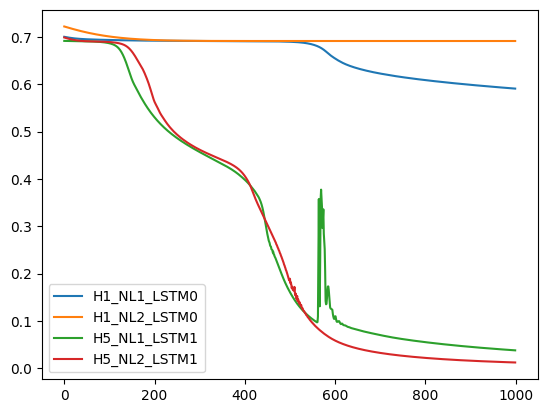

,H1_NL1_LSTM0,H1_NL2_LSTM0,H5_NL1_LSTM1,H5_NL2_LSTM1
accuracy %,80.000001,30.000001,80.000001,69.999999


In [28]:
import pandas as pd

for loss_it in losses_models.values():
  plt.plot(loss_it)
plt.legend(losses_models.keys())
plt.show()

pd.DataFrame(np.asarray(list(test_accuracy_models.values()))*100, columns=['accuracy %'],
             index=test_accuracy_models.keys()).transpose()

# 3. Deep Learning and RNNs for Crypto-Analysis.

## 3.1 Practical problem: RNNs for Cryptanalysis

Cryptography, or cryptology, is the practice and study of techniques for secure communication in the presence of adversarial behaviour.  Since recurrent neural networks (RNNs) represent the state
of the art of many sequential modelling (i.e. translation, image captioning, and speech recognition), we will take advantage of RNNs to learn decryption algorithms by mapping from plaintext to ciphertext.

More formally, we assume that we are provided with a training set formed by N pairs of encrypted messages:

$ \mathcal{E}=\{\mathbf{e}^1,...,\mathbf{e}^N \} $

and ground-truth decrypted messages:

$ \mathcal{D}=\{\mathbf{d}^1,...,\mathbf{d}^N \} $

where each $\mathbf{e} = [e_1,...,e_T]$ and $\mathbf{d}=[d_1,...,d_T]$ are sequences of characters of length $T$


Therefore, we want to use a RNN to learn the encrypted mapping:

$d_t = \hat{F}(e_t,e_{0:t_-1}) \approx \hat{F}_{NN}(e_t,e_{0:t_-1},\theta) $

where $F$ our function that depends on the letter $e_t$ letter in the encrypted message, $e_{0:t_-1}$ are the previous letters in the encrypted message,$\theta$ for the parameters of our network. The function must output the decrypted letter $d_t$ for each $t$ in the message.

In this example code, our task consists of decrypting secret messages using an LSTM. For this example, we will assume that our messages are encrypted using the **Vigenère Cipher**, which is based on polyalphabetic substitution. Vigenère cipher works by replacing the original plaintext structure in a ciphertext generated by using several different monoalphabetic substitution ciphers rather than just one. The code key specifies which particular substitution is to be employed for encrypting each plaintext letter. For more details, check <a href="https://en.wikipedia.org/wiki/Vigen%C3%A8re_cipher">Vigenère cipher</a>.

<img src='https://drive.google.com/uc?id=1jhJoNAba86KU5_7Bu7S8kxfEPG0zwOPA'>


We provide a dataset formed by 32 string-chunk encrypted messages and their original decrypted messages. A total of 5000 messages have been used (4000 for training and 1000 for testing).


## 3.2 Needed imports and data loading

In [29]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import random
import pickle
import os
import matplotlib
from torch import nn
import string
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
myDrive = '/content/drive/My Drive/DeepLearning_2024/P2/MaterialP2/Data/'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
pkl_file = open(myDrive+'train_vigenere.pkl', 'rb')
train = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open(myDrive+'test_vigenere.pkl', 'rb')
test = pickle.load(pkl_file)
pkl_file.close()

vocabulary = [char for char in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'] # Predefined vocabulary

In [31]:
len(test)

1000

## 3.3 Visualizing encrypted and decrypted samples

In [32]:
def decode_message(message, vocabulary):
  decoded = ''
  for letter_code in message:
    decoded += vocabulary[letter_code]
  return decoded

idx_sample = 5
print(f'Train Message encrypted: {decode_message(train[idx_sample][0],vocabulary)}')
print(f'Train Message decrypted: {decode_message(train[idx_sample][1],vocabulary)}')


Train Message encrypted: UIGMQQQDAZUYGTBUQAZTMYQKWHXUKLYE
Train Message decrypted: IINVITEDHIMBUTIDIDNTTHINKHEDCOME


## 3.4 Define Decrypter Network and training function

In [33]:
class DecrypterNetwork(nn.Module):
  def __init__(self,
               hidden_size : int = 8,
               num_layers = 1,
               num_letters = 26,
               letters_embedding_size : int = 8,
               use_lstm : bool = False):
    # Define RNN or LSTM architecture
    super().__init__()
    self.hidden_size = hidden_size
    self.num_letters = num_letters
    self.letters_embedder = torch.nn.Embedding(num_letters, letters_embedding_size)
    self.use_lstm = use_lstm
    self.softmax = nn.Softmax(dim=1)
    if(use_lstm):
      self.rnn =  nn.LSTM(input_size = letters_embedding_size, hidden_size = hidden_size,
                          num_layers=num_layers, batch_first = True)
    else:
      self.rnn =  nn.RNN(input_size = input_size, hidden_size = hidden_size,
                         num_layers=num_layers, batch_first = True)
    self.last_linear = nn.Linear(hidden_size,num_letters)

  def forward(self, X):
    N = X.shape[0]
    L = X.shape[1]
    embedded_letters = self.letters_embedder(X)
    # Get hidden states for all letters in the sequence
    hidden_states,_ = self.rnn(embedded_letters)
    # In case of multiple input sequneces flat (N,L,hidden_size) to (N*L,hidden_size) for linear layer
    hidden_states_concat = hidden_states.reshape(-1,self.hidden_size)
    # Get letters probability using the hidden states for each position in the sequence
    letters_loggits = self.last_linear(hidden_states_concat)
    #Use soft-max over logits and reshape to format (N,L,num_letteres)
    letters_probs = self.softmax(letters_loggits).reshape(N,L,self.num_letters)
    return letters_probs

### Decryption with untrained neural network

In [34]:
# Initialize  Decrypter Network
letters_embedding_size = 8
hidden_size = 16
num_letters = len(vocabulary)
num_layers = 2
use_lstm = True

decrypter_network = DecrypterNetwork(letters_embedding_size=letters_embedding_size,
                                    num_layers=num_layers,
                                    num_letters=num_letters,
                                    hidden_size=hidden_size,
                                    use_lstm=use_lstm)

# Inference over single training sequence
letters_probs = decrypter_network(train[0][0].unsqueeze(0))
print(letters_probs[0,0,:])

# get index of letter with max probability
_,maxprob_letters_idx = letters_probs.max(dim=2)
print(f'Original Message Encrypted: {decode_message(train[1][0],vocabulary)}')
print(f'Predicted Message decrypted: {decode_message(maxprob_letters_idx[0],vocabulary)}')

tensor([0.0441, 0.0460, 0.0323, 0.0352, 0.0413, 0.0392, 0.0335, 0.0416, 0.0336,
        0.0449, 0.0397, 0.0316, 0.0344, 0.0444, 0.0348, 0.0354, 0.0413, 0.0361,
        0.0474, 0.0356, 0.0378, 0.0465, 0.0407, 0.0332, 0.0328, 0.0366],
       grad_fn=<SliceBackward0>)
Original Message Encrypted: UAFZVCGLERKZARWNQQTYHLZSUEPGWFZT
Predicted Message decrypted: SVVVVVVVBBBBBBBBBBVVVVVVVVVVVVBB


## 3.5 Training and evaluation functions

In [35]:
def train_test(model, num_epochs, loss_fn, optimizer,
               train_encrypted, train_decrypted, test_encrypted, test_decrypted,
               vocabulary, use_cuda = True):
    if(use_cuda):
      model = model.cuda()
      train_encrypted = train_encrypted.cuda()
      train_decrypted = train_decrypted.cuda()
      test_encrypted = test_encrypted.cuda()
      test_decrypted = test_decrypted.cuda()
    else:
      model = model.cuda()
      train_encrypted = train_encrypted.cpu()
      train_decrypted = train_decrypted.cpu()
      test_encrypted = test_encrypted.cpu()
      test_decrypted = test_decrypted.cpu()

    accuracies, max_accuracy = [], 0
    loss_hist = []
    acc_hist = []
    epochs_hist = []
    test_loss_hist = []

    for epoch in range(num_epochs):
        # TRAINING AND BACK-PROPAGATION
        optimizer.zero_grad()
        letters_probs = model(train_encrypted)
        loss = loss_fn(letters_probs.log().permute(0,2,1), # rearrange as to (N_sequences, N_letters, N_lenght_sequences)
                       train_decrypted)
        loss.backward() # Backpropagate
        optimizer.step() # Update weights
        loss_hist.append(loss.item())


        # EVALUATION
        letters_probs = model(test_encrypted)
        test_loss = loss_fn(letters_probs.log().permute(0,2,1), # rearrange as to (N_sequences, N_letters, N_lenght_sequences)
                            test_decrypted)
        _,maxprob_letters_idx = letters_probs.max(dim=2) # get letter with maximum prob
        accuracy = ((maxprob_letters_idx==test_decrypted)*1.0).mean() # compute accuracy
        test_loss_hist.append(test_loss.item())
        acc_hist.append(accuracy.item())

        if(epoch%50==0):
          print(f'Epoch {epoch} \t Train Loss {round(loss.item(),3)} \t Test Loss {round(test_loss.item(),3)} \t Test Acc. (%)  {round(accuracy.item()*100,1)}')
    print(f'Final Epoch \t Train Loss {round(loss.item(),3)} \t Test Loss {round(test_loss.item(),3)} \t Test Acc. (%)  {round(accuracy.item()*100,1)}')
    return model,loss_hist, test_loss_hist, acc_hist

## 3.6 Training and evaluation

In [36]:
# Converting training and testing datasets into PyTorch Tensor (N_seqs, lenght_seqs)
train_encrypted = torch.concat([train_sample[0].unsqueeze(0) for train_sample in train],dim=0)
train_decrypted = torch.concat([train_sample[1].unsqueeze(0) for train_sample in train],dim=0)
test_encrypted = torch.concat([test_sample[0].unsqueeze(0) for test_sample in test],dim=0)
test_decrypted = torch.concat([test_sample[1].unsqueeze(0) for test_sample in test],dim=0)

test_encrypted.shape
decrypter_network = decrypter_network.cuda()
decrypted_letters_prob = decrypter_network(test_encrypted.cuda())
print(decrypted_letters_prob.shape) # (N_seqs, seq_length, n_letters)

torch.Size([1000, 32, 26])


In [37]:
# Initialize  Decrypter Network
letters_embedding_size = 2
hidden_size = 4
num_letters = len(vocabulary)
num_layers = 1
use_lstm = True
use_cuda = True

decrypter_network = DecrypterNetwork(letters_embedding_size=letters_embedding_size,
                                    num_layers=num_layers,
                                    num_letters=num_letters,
                                    hidden_size=hidden_size,
                                    use_lstm=use_lstm)

# Define loss, optimizer and run training/evaluation loop
num_epochs=5000
CE_loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(decrypter_network.parameters(), lr=1e-2)

decrypter_network,loss_hist, test_loss_hist, acc_hist = train_test(decrypter_network,
                                                 num_epochs,
                                                 CE_loss,
                                                 optimizer,
                                                 train_encrypted, train_decrypted, test_encrypted, test_decrypted,
                                                 vocabulary,
                                                 use_cuda=use_cuda)


Epoch 0 	 Train Loss 3.218 	 Test Loss 3.204 	 Test Acc. (%)  8.4
Epoch 50 	 Train Loss 2.784 	 Test Loss 2.777 	 Test Acc. (%)  17.3
Epoch 100 	 Train Loss 2.54 	 Test Loss 2.535 	 Test Acc. (%)  23.3
Epoch 150 	 Train Loss 2.398 	 Test Loss 2.398 	 Test Acc. (%)  23.0
Epoch 200 	 Train Loss 2.318 	 Test Loss 2.32 	 Test Acc. (%)  24.3
Epoch 250 	 Train Loss 2.249 	 Test Loss 2.25 	 Test Acc. (%)  26.4
Epoch 300 	 Train Loss 2.185 	 Test Loss 2.185 	 Test Acc. (%)  29.3
Epoch 350 	 Train Loss 2.136 	 Test Loss 2.136 	 Test Acc. (%)  32.3
Epoch 400 	 Train Loss 2.094 	 Test Loss 2.092 	 Test Acc. (%)  34.3
Epoch 450 	 Train Loss 2.055 	 Test Loss 2.055 	 Test Acc. (%)  35.5
Epoch 500 	 Train Loss 2.03 	 Test Loss 2.031 	 Test Acc. (%)  35.7
Epoch 550 	 Train Loss 2.011 	 Test Loss 2.013 	 Test Acc. (%)  35.8
Epoch 600 	 Train Loss 1.992 	 Test Loss 1.993 	 Test Acc. (%)  36.3
Epoch 650 	 Train Loss 1.974 	 Test Loss 1.974 	 Test Acc. (%)  36.7
Epoch 700 	 Train Loss 1.96 	 Test Loss 1.

## 3.7 Results Visualization

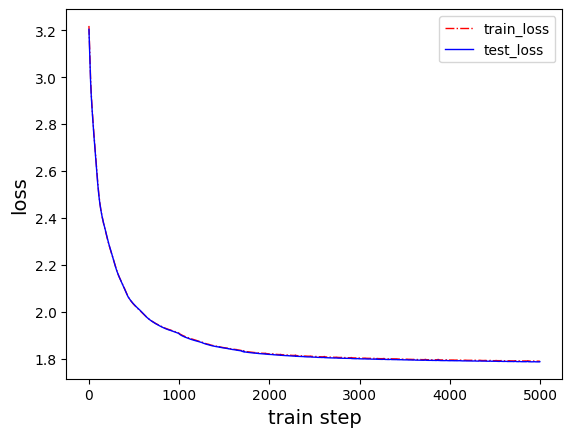

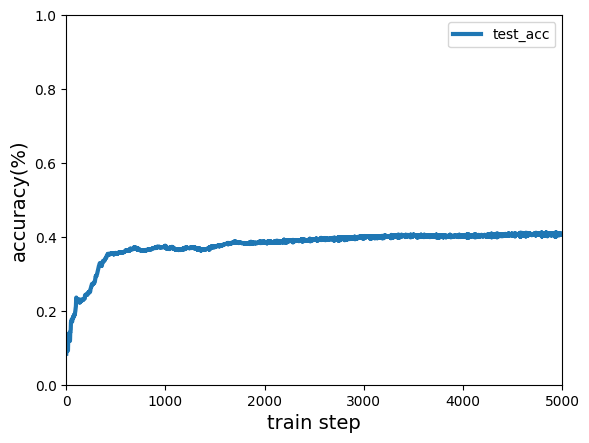

--------------------------------------
Original Message encrypted: IEARLXYAKMMIAULDMXXSTKCOPAREQDTT
Message decrypted: WEHADAMARVELOUSMEALSATURDAYNIGHT
Prediction Message decrypted: AEOROEHONEEAODOREAESATDOSOREERAA
Prediction Message Accuracy : 0.25
--------------------------------------
Original Message encrypted: IIECGLGGBMMJQAGFBEQRZCIPEOYNIQQR
Message decrypted: WILLYOUGIVEMEANOTHERGLASSOFWATER
Prediction Message decrypted: AAEANONYTEESIONTTHERIDADHOHUATER
Prediction Message Accuracy : 0.41
--------------------------------------
Original Message encrypted: YAGPSFZDLFNMQOICMIUVXFVLGRLKZBQT
Message decrypted: MANYKINDSOFPEOPLELIVEONOURSTREET
Prediction Message decrypted: HONHSTNYOOUEERADAAINATEOURONITEH
Prediction Message Accuracy : 0.28
--------------------------------------
Original Message encrypted: LIKZEBZTMFBEQOMYMOEIWVWCFHXKIYXE
Message decrypted: ZIRIWENTTOTHEOTHERSIDEOFTHETABLE
Prediction Message decrypted: OANIEENTTTTHEOEHEREADEOATHETASEN
Prediction Message Accuracy : 0.62


In [38]:
plt.plot(loss_hist, '-.r', linewidth=1.0, label='train_loss')
plt.plot(test_loss_hist,'-b', linewidth=1.0, label='test_loss')
plt.xlabel('train step', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()
plt.show()

plt.plot(acc_hist, linewidth=3.0, label='test_acc')
plt.xlabel('train step', fontsize=14)
plt.ylabel('accuracy(%)', fontsize=14)
plt.ylim([0, 1])
plt.xlim([0, num_epochs])
plt.legend()
plt.show()

decrypter_network = decrypter_network.cpu()
for idx_sample in range(0,10):
  # Inference over single training sequence
  letters_probs = decrypter_network(test[idx_sample][0].unsqueeze(0))
  # get index of letter with max probability
  _,maxprob_letters_idx = letters_probs.max(dim=2)
  print('--------------------------------------')
  print(f'Original Message encrypted: {decode_message(test[idx_sample][0],vocabulary)}')
  print(f'Message decrypted: {decode_message(test[idx_sample][1],vocabulary)}')
  print(f'Prediction Message decrypted: {decode_message(maxprob_letters_idx[0],vocabulary)}')
  acc = (1.0*(maxprob_letters_idx[0]==test[idx_sample][1])).mean().item()
  print(f'Prediction Message Accuracy : {round(acc,2)}')